In [1]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

!pip install yfinance

In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [4]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [5]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-10-24 00:00:00+00:00,13108.062500,24542317940,412.457611,12201739194,1.000909,38024192721,30.588821,407454460
2020-10-25 00:00:00+00:00,13031.173828,24406920575,406.217773,10890207469,1.000721,37992408340,30.107540,391997739
2020-10-26 00:00:00+00:00,13075.248047,29461458313,393.888306,15155684229,1.000958,53856600950,31.154560,624224136
2020-10-27 00:00:00+00:00,13654.218750,33749878156,403.997040,13940434102,1.000223,50594554703,31.638721,715978374
2020-10-28 00:00:00+00:00,13271.285156,35867318895,388.650757,15276441134,1.000340,54295663450,30.363506,477279858


In [6]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-10-19 00:00:00+00:00,108666.710938,47657008953,3984.649658,32870655221,1.000401,113441520509,1109.680054,3690436753
2025-10-20 00:00:00+00:00,110588.929688,63507793085,3980.760254,40224612563,1.000375,140035880063,1101.061646,4209252745
2025-10-21 00:00:00+00:00,108476.890625,101194375480,3876.764160,49960290350,1.000462,189249929340,1057.440430,4398689427
2025-10-22 00:00:00+00:00,107688.585938,80807013218,3808.122314,46173305673,1.000188,164510413668,1072.047974,3625757780
2025-10-24 00:00:00+00:00,111092.515625,52976574464,3964.869873,37191606272,1.000129,131101892608,1138.808838,5764950016


In [7]:
data.shape

(1826, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2020-10-24 00:00:00+00:00 to 2025-10-24 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [9]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [10]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03
mean,51552.184191,3.636878e+10,2433.880981,1.906224e+10,1.000170,6.910542e+10,423.262599,1.761152e+09
std,29061.120589,2.224650e+10,974.724546,1.264685e+10,0.000714,4.394872e+10,214.544273,1.480177e+09
min,13031.173828,5.331173e+09,382.819977,2.081626e+09,0.995872,9.989859e+09,26.857050,2.038465e+08
25%,27928.166992,2.142473e+10,1686.533600,1.025222e+10,0.999923,3.960196e+10,272.829796,7.668617e+08
50%,43290.455078,3.148331e+10,2332.242676,1.610638e+10,1.000157,5.868013e+10,372.171539,1.528656e+09
75%,65863.402344,4.576950e+10,3179.656311,2.381424e+10,1.000414,8.462091e+10,587.087662,2.128385e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


#Exploratory Data Analysis

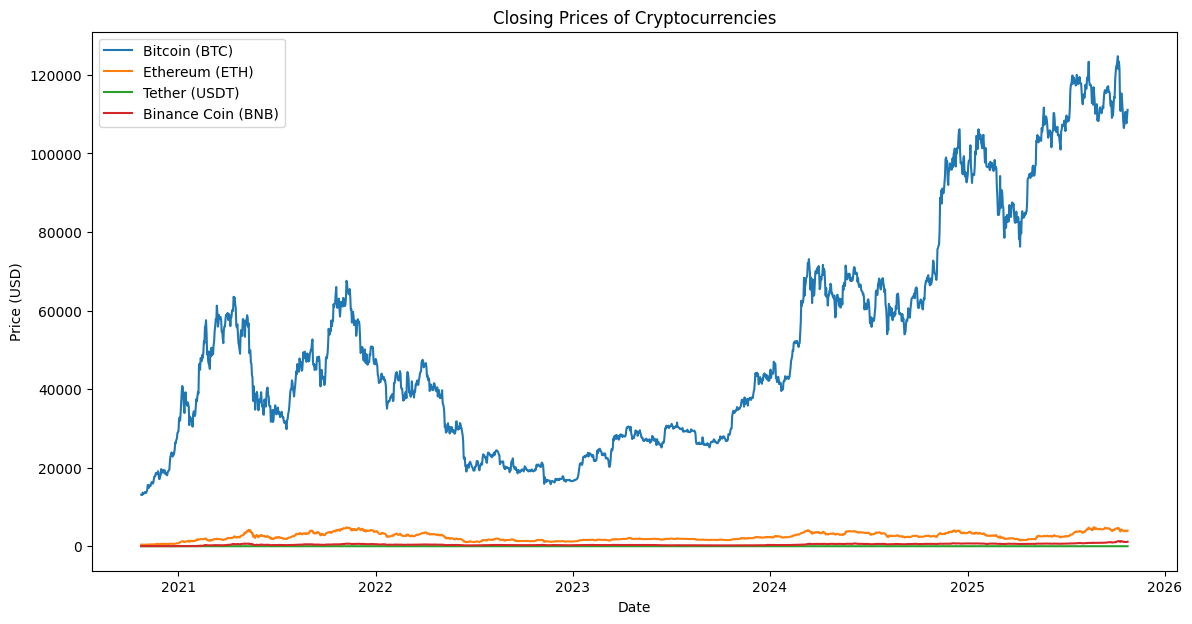

In [11]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

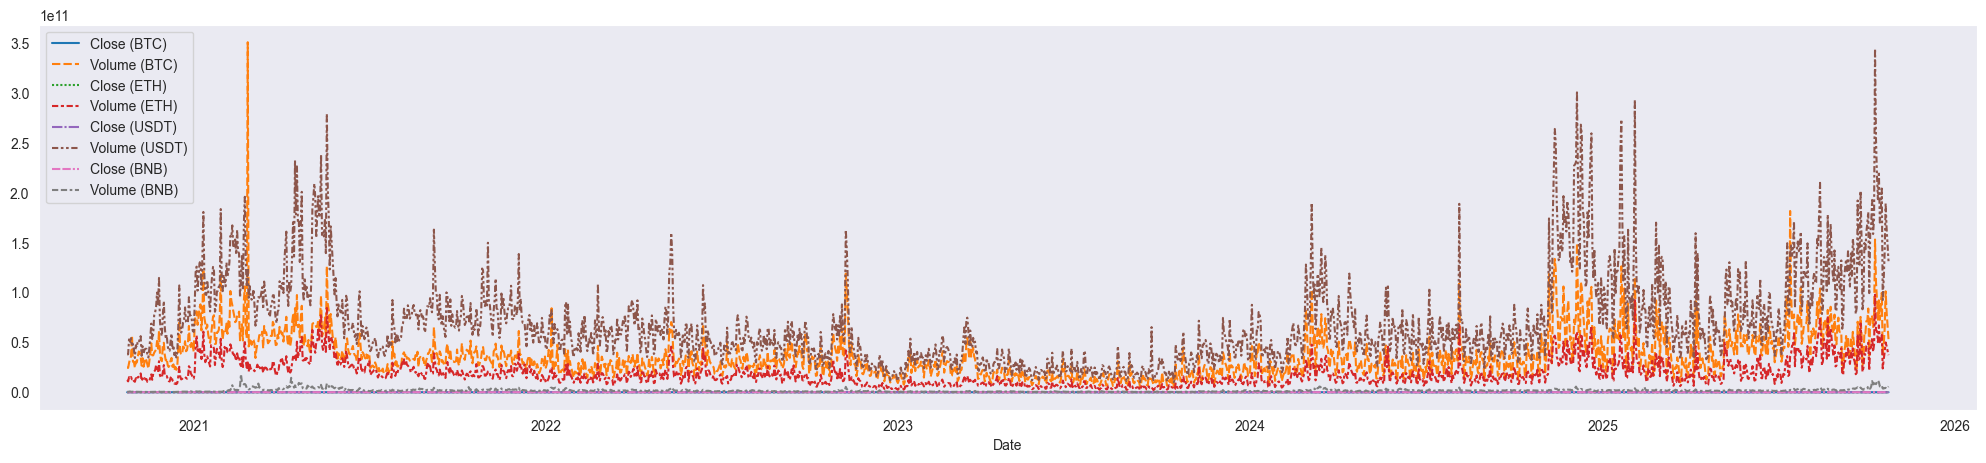

In [12]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

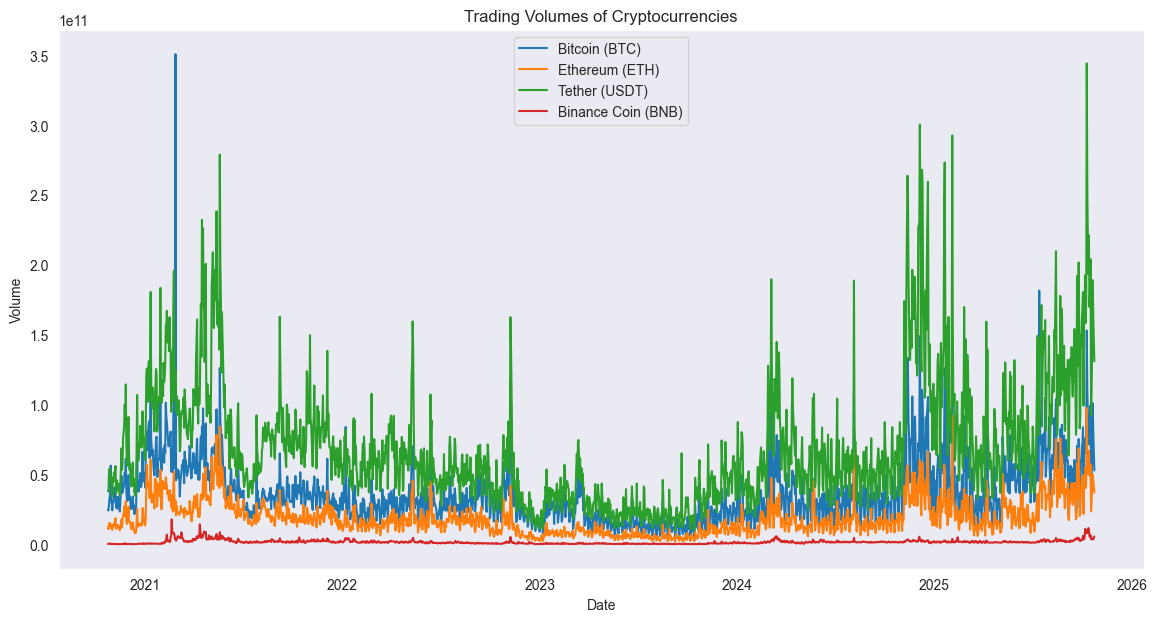

In [13]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


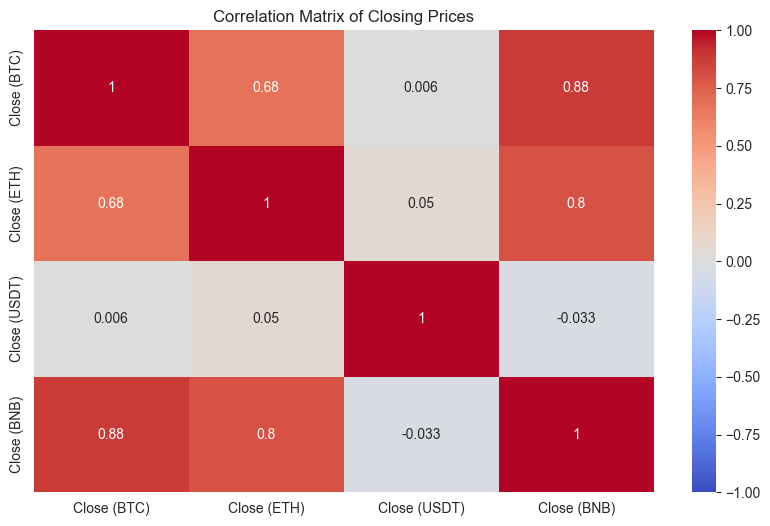

In [14]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


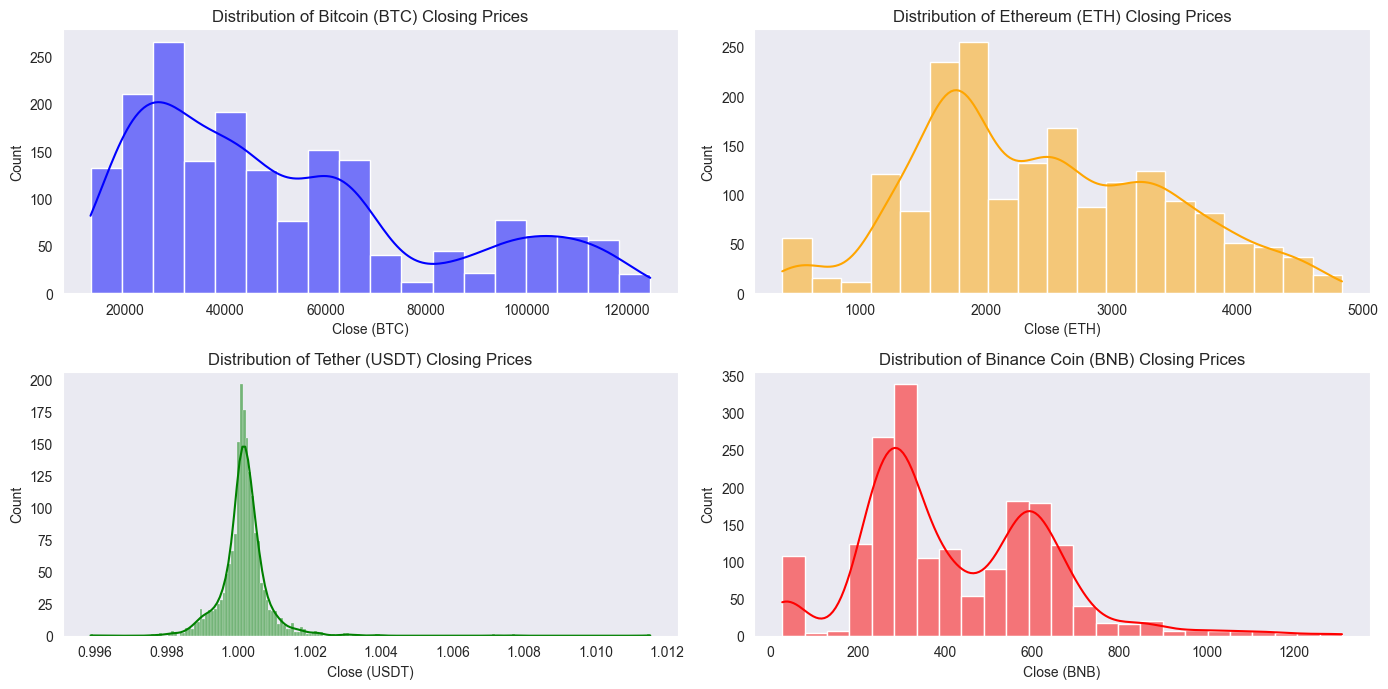

In [15]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

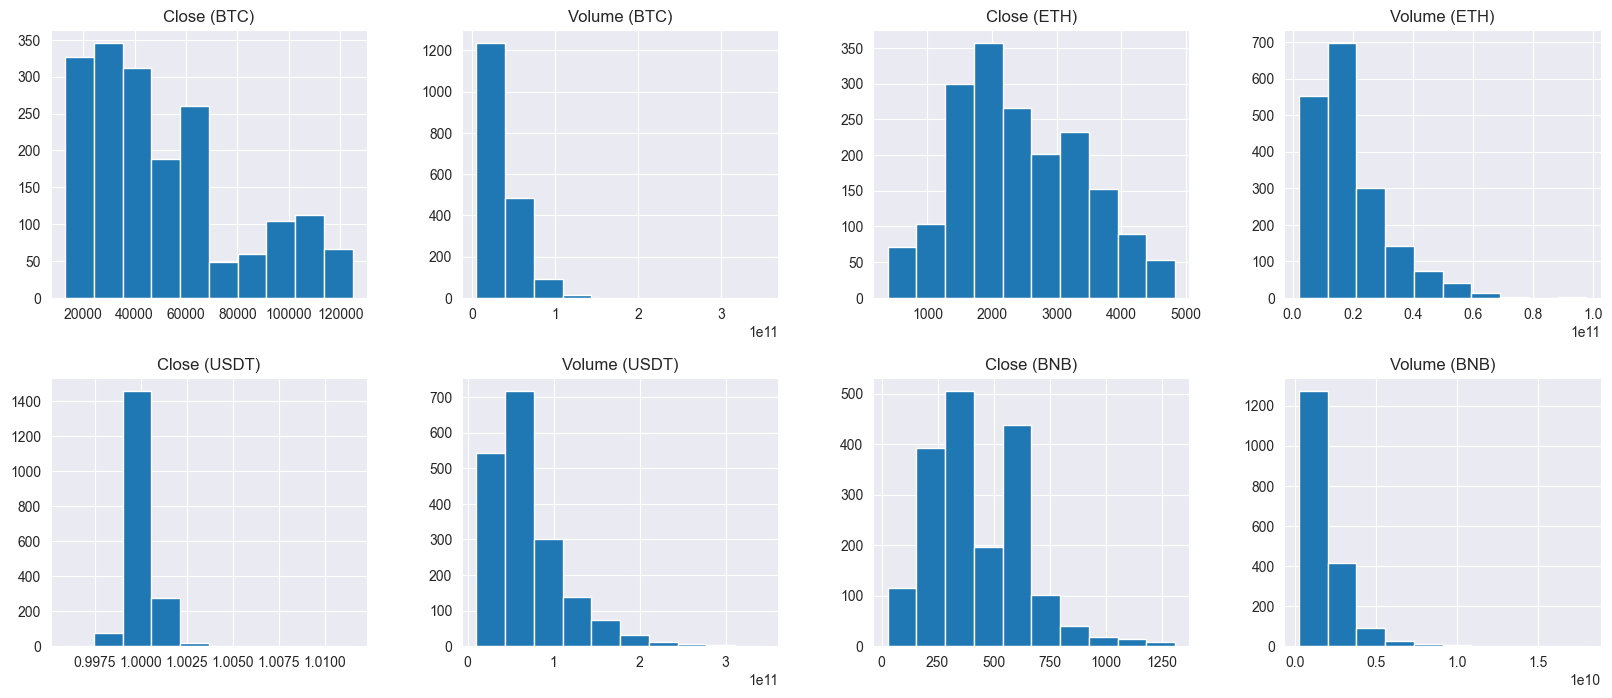

In [16]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

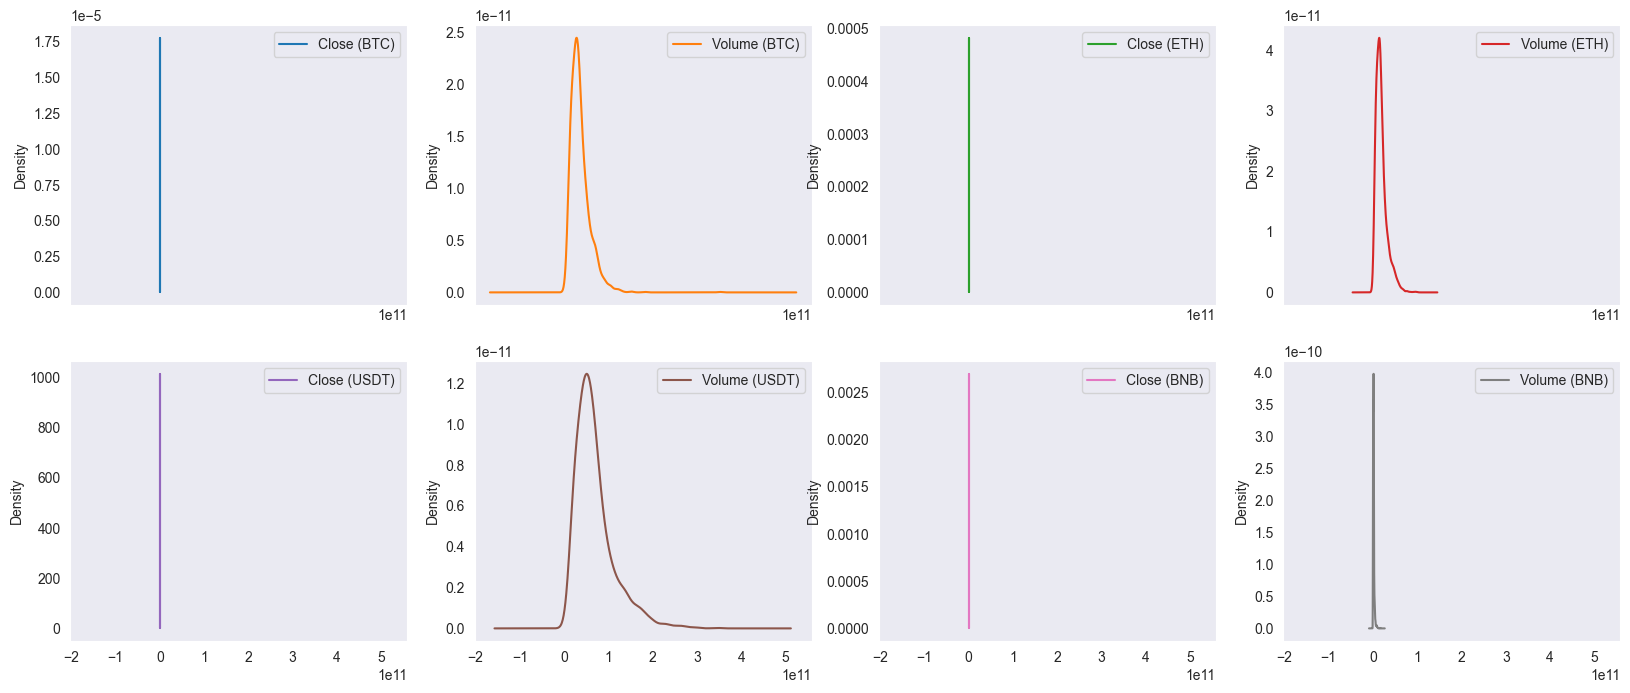

In [17]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

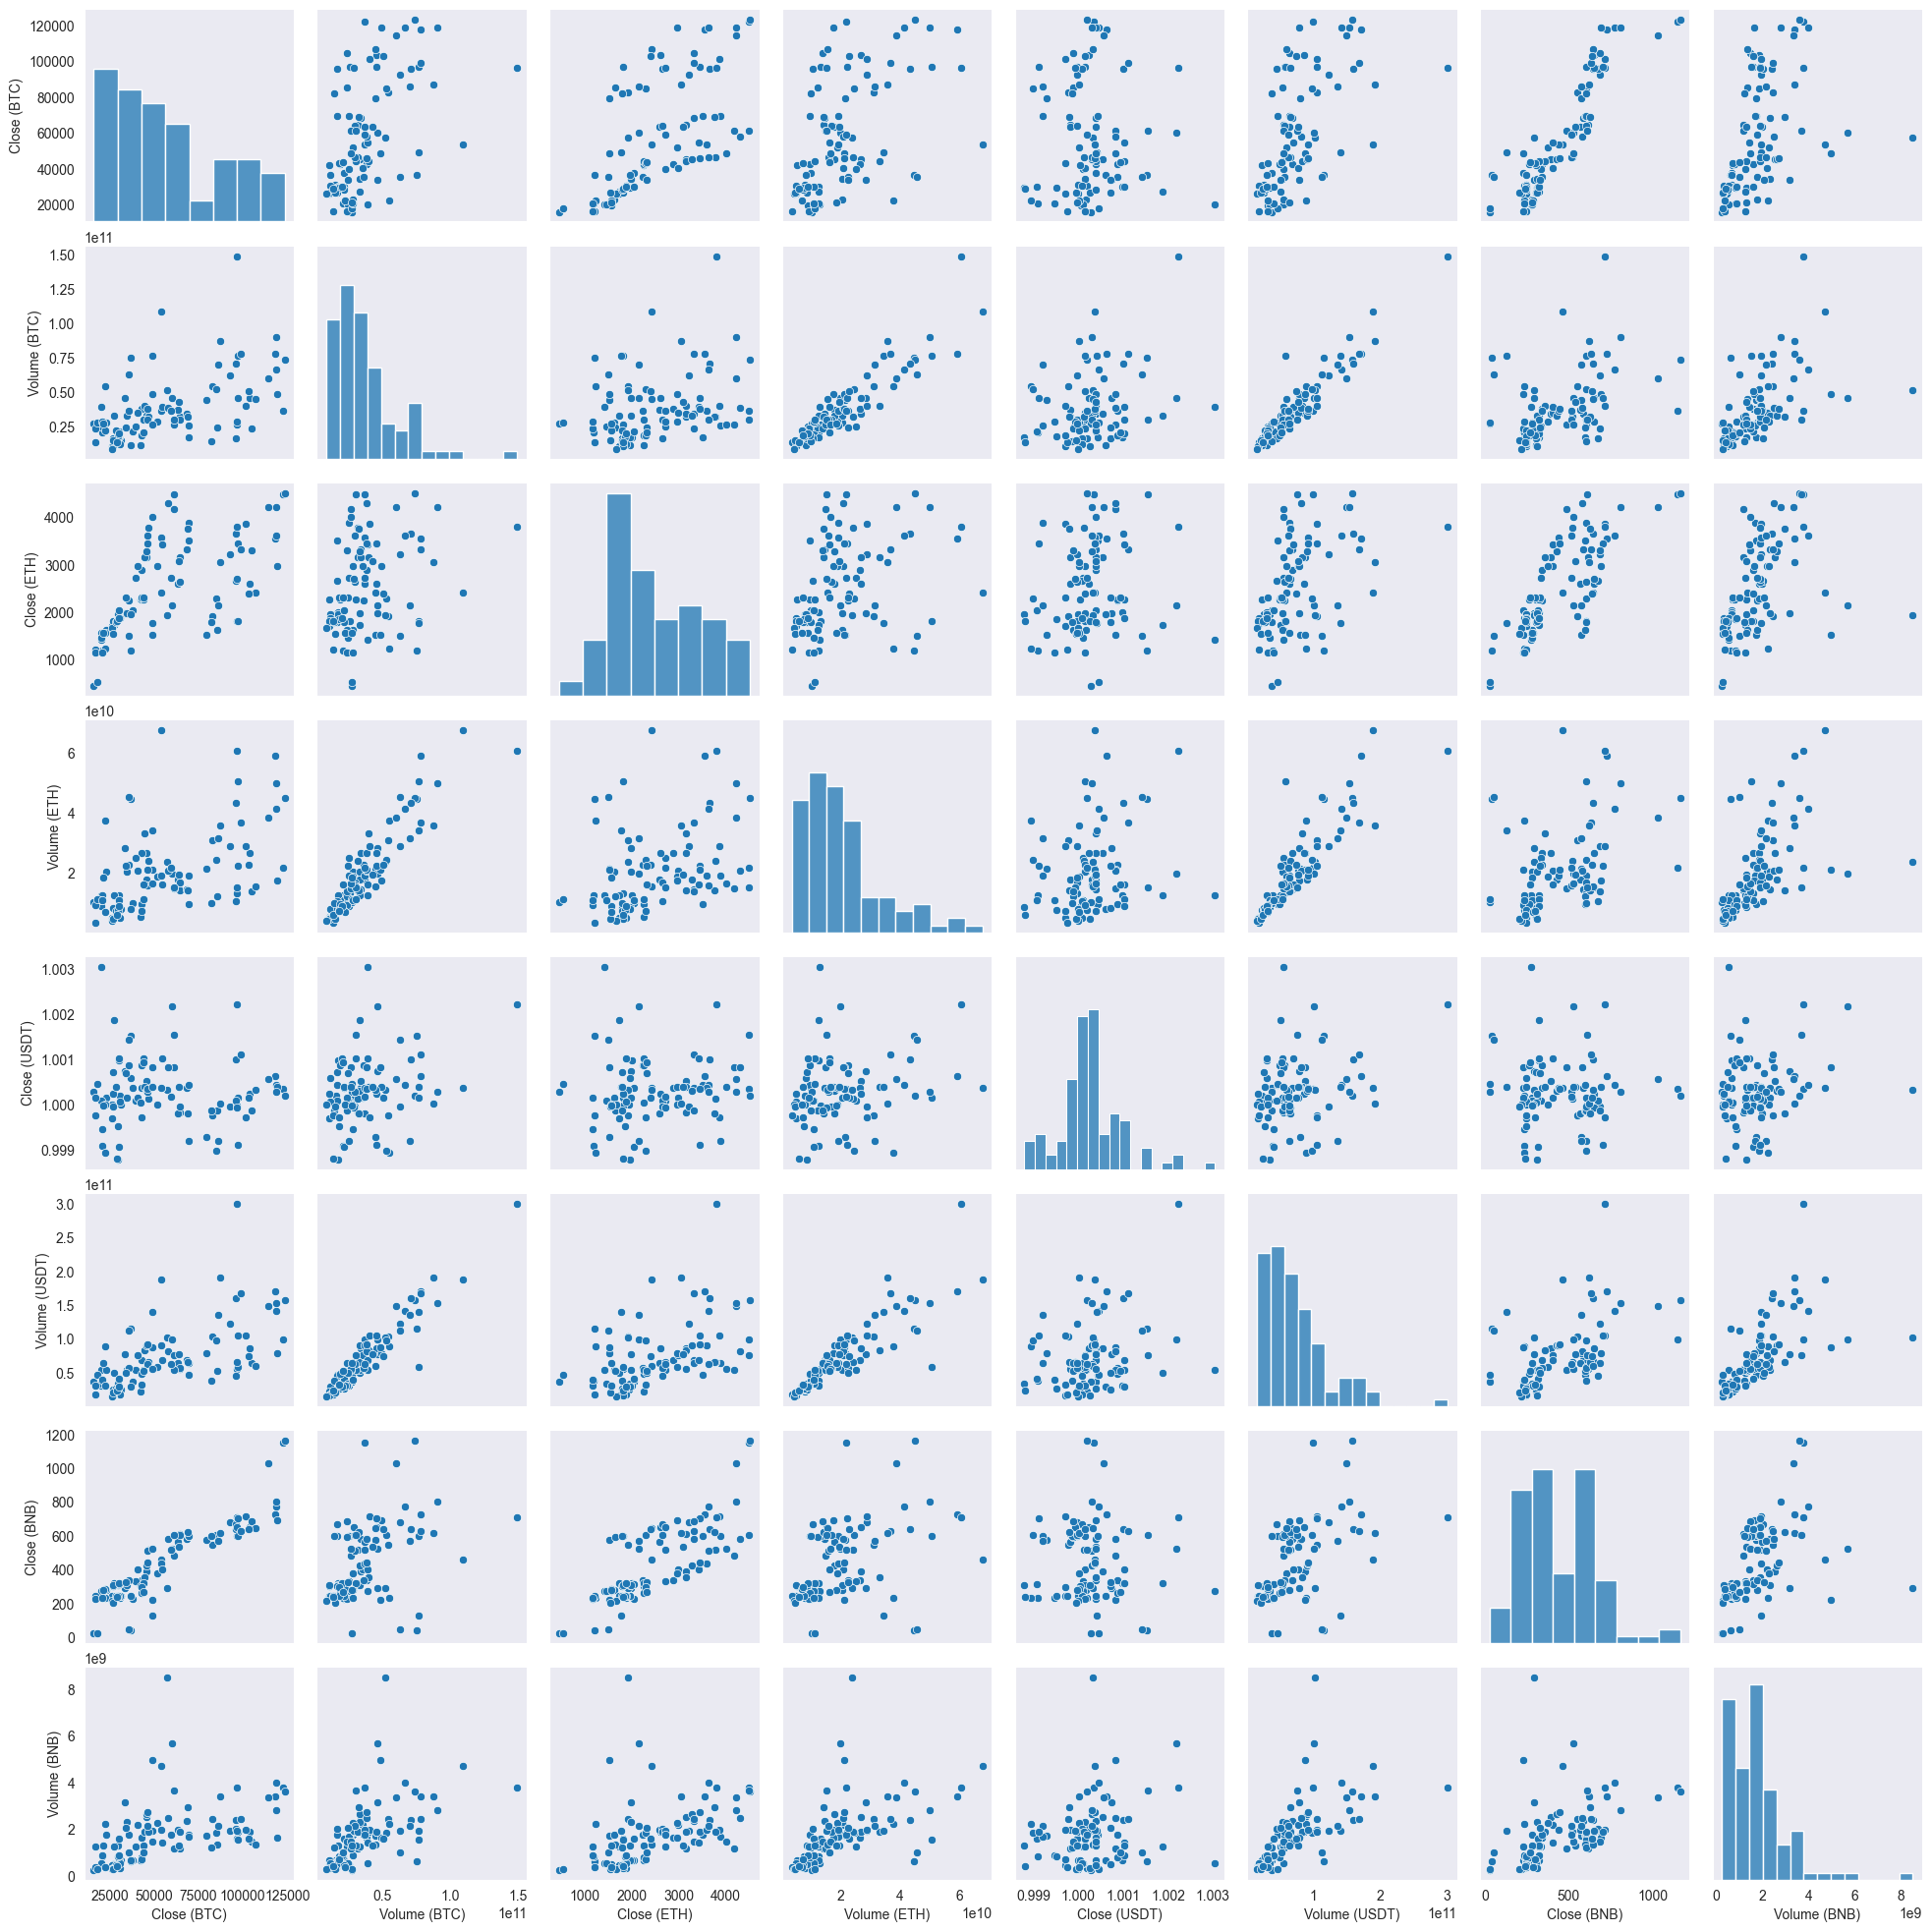

In [18]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [19]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [20]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-10-24 00:00:00+00:00,24542317940,412.457611,12201739194,1.000909,38024192721,30.588821,407454460
2020-10-25 00:00:00+00:00,24406920575,406.217773,10890207469,1.000721,37992408340,30.107540,391997739
2020-10-26 00:00:00+00:00,29461458313,393.888306,15155684229,1.000958,53856600950,31.154560,624224136
2020-10-27 00:00:00+00:00,33749878156,403.997040,13940434102,1.000223,50594554703,31.638721,715978374
2020-10-28 00:00:00+00:00,35867318895,388.650757,15276441134,1.000340,54295663450,30.363506,477279858


In [21]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-10-19 00:00:00+00:00,47657008953,3984.649658,32870655221,1.000401,113441520509,1109.680054,3690436753
2025-10-20 00:00:00+00:00,63507793085,3980.760254,40224612563,1.000375,140035880063,1101.061646,4209252745
2025-10-21 00:00:00+00:00,101194375480,3876.764160,49960290350,1.000462,189249929340,1057.440430,4398689427
2025-10-22 00:00:00+00:00,80807013218,3808.122314,46173305673,1.000188,164510413668,1072.047974,3625757780
2025-10-24 00:00:00+00:00,52976574464,3964.869873,37191606272,1.000129,131101892608,1138.808838,5764950016


In [22]:
Y.head()


Date
2020-10-24 00:00:00+00:00    13108.062500
2020-10-25 00:00:00+00:00    13031.173828
2020-10-26 00:00:00+00:00    13075.248047
2020-10-27 00:00:00+00:00    13654.218750
2020-10-28 00:00:00+00:00    13271.285156
Name: Close (BTC), dtype: float64

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1460, 7)
X_test shape: (366, 7)
y_train shape: (1460,)
y_test shape: (366,)


In [25]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\umari\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [26]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [27]:
X_train


array([[1.00023997e+00, 3.70591978e+10, 5.99331360e+02, 1.22191514e+09],
       [1.00020695e+00, 3.12849599e+10, 5.53565063e+02, 1.41206521e+09],
       [1.00026000e+00, 1.32581111e+11, 6.22373169e+02, 2.11552825e+09],
       ...,
       [1.00002396e+00, 3.90196451e+10, 5.85995056e+02, 1.30660003e+09],
       [9.99981999e-01, 8.13278798e+10, 3.79304291e+02, 1.83477072e+09],
       [1.00010204e+00, 4.96409764e+10, 2.80577484e+02, 8.70477242e+08]])

In [28]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 149489834.33840418
R-squared: 0.8213211135321336

----- Ridge Regression -----
Mean Squared Error (MSE): 148282799.99002203
R-squared: 0.8227638307192379

----- Lasso Regression -----
Mean Squared Error (MSE): 149389114.5368383
R-squared: 0.8214414996578437

----- ElasticNet Regression -----
Mean Squared Error (MSE): 749589226.5611124
R-squared: 0.1040476504438772

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 881563065.8296368
R-squared: -0.05369510676600986

----- Decision Tree Regression -----
Mean Squared Error (MSE): 86440321.67608176
R-squared: 0.8966815336215902

----- Random Forest Regression -----
Mean Squared Error (MSE): 52638782.51438969
R-squared: 0.9370830860417974

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 57519710.54983019
R-squared: 0.9312491188682966

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 62013575.17960841
R-squared: 0.925877792239032

c:\Users\umari\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 540463809.7589235
R-squared: 0.3540064303951376

                             Model           MSE  R-squared
0                Linear Regression  1.494898e+08   0.821321
1                 Ridge Regression  1.482828e+08   0.822764
2                 Lasso Regression  1.493891e+08   0.821441
3            ElasticNet Regression  7.495892e+08   0.104048
4  Support Vector Regression (SVR)  8.815631e+08  -0.053695
5         Decision Tree Regression  8.644032e+07   0.896682
6         Random Forest Regression  5.263878e+07   0.937083
7     Gradient Boosting Regression  5.751971e+07   0.931249
8   K-Nearest Neighbors Regression  6.201358e+07   0.925878
9  Neural Network Regression (MLP)  5.404638e+08   0.354006


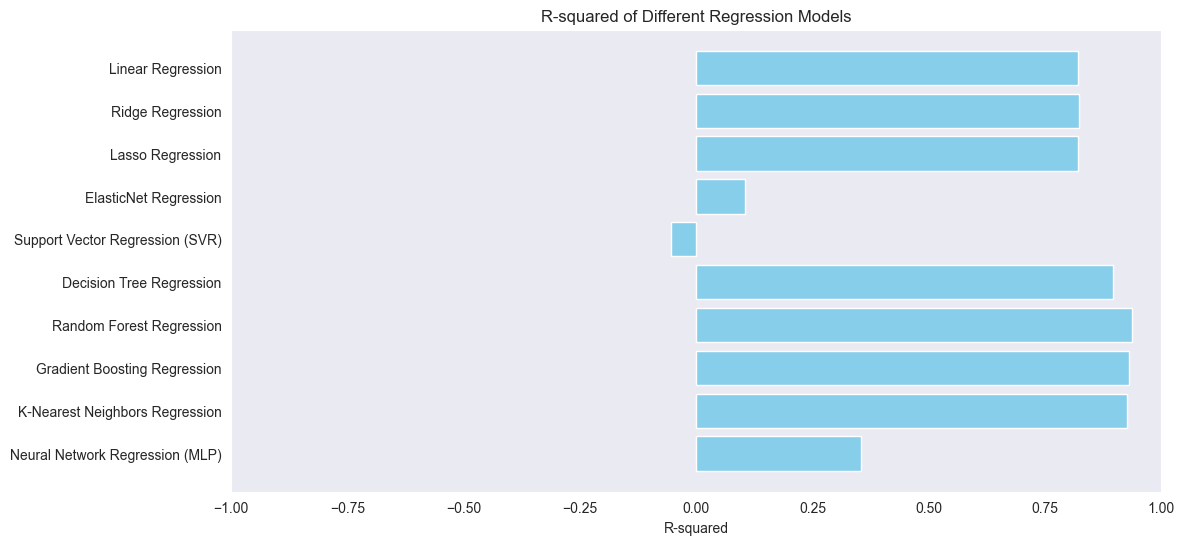

In [30]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [31]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 52012816.907033056
Loaded Random Forest Regression - R-squared: 0.9378312762995809
